In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import collections
from collections import Counter
import wordcloud
from wordcloud import WordCloud

In [78]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [84]:
tweets = pd.read_csv('data/train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


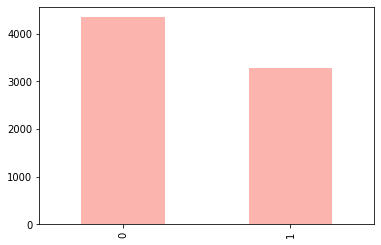

In [22]:
#veamos la distribucion del target
tweets['target'].value_counts().plot(kind='bar', colormap='Pastel1')
#hay mas falsos que verdaderos

In [9]:
#top 20 posting location
tweets['location'].value_counts().head(20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
California, USA     15
Everywhere          15
New York, NY        15
United Kingdom      14
Name: location, dtype: int64

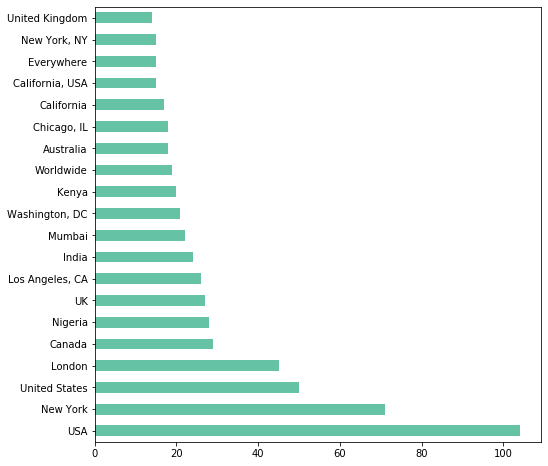

In [24]:
tweets['location'].value_counts().head(20).plot(kind='barh', colormap='Set2',figsize=(8,8))

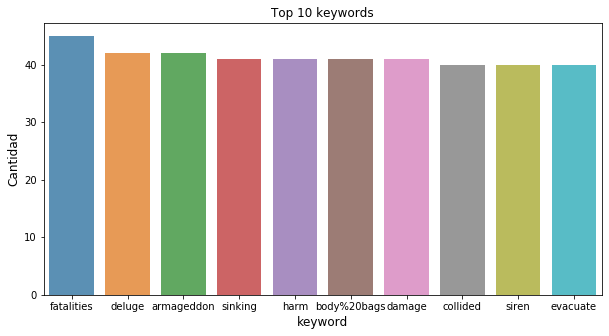

In [30]:
keyword_count  = tweets['keyword'].value_counts()
keyword_count = keyword_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(keyword_count.index, keyword_count.values, alpha=0.8)
plt.title('Top 10 keywords')
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('keyword', fontsize=12)
plt.show()

In [34]:
hashtag_pattern = re.compile(r'(^|\s+)(#)\w+') # busca hastags
user_mention_pattern = re.compile(r'(^|\s+)(@)\w+') # busca menciones de usuarios

In [52]:
tweets['hashtag'] = tweets['text'].str.contains(hashtag_pattern) * 1
tweets['user'] = tweets['text'].str.contains(user_mention_pattern) * 1
tweets['longitud'] = tweets['text'].str.len()
tweets.head()

C:\Users\Laptop\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,id,keyword,location,text,target,hashtag,user,longitud
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,0,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,0,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,0,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,0,88


In [76]:
def to_lowercases(x):
    return x.lower()

def clean_text(x):
    text = re.sub('(\d+)','',x)    
    return text

def remove_punctuation(x):
    text_sin_puct = [t for t in x if t not in string.punctuation]
    text_sin_puct = ''.join(text_sin_puct)
    return text_sin_puct



def get_tokens(x):
    tokens = nltk.word_tokenize(x)
    return tokens



stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
    text_sin_stopwords = [t for t in x if t not in stop_words]
    
    return text_sin_stopwords

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lemmatization(x):
    try:
        lemmatized = np.vectorize(lemma.lemmatize)(x)
        return lemmatized
    except ValueError:
        return []


In [85]:
tweets['text2'] = tweets['text'].apply(to_lowercases)
tweets.head()

,id,keyword,location,text,target,text2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [86]:
tweets['text2'] = tweets['text2'].apply(clean_text)
tweets.head()

,id,keyword,location,text,target,text2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [87]:
tweets['text2'] = tweets['text2'].apply(remove_punctuation)
tweets.head()

,id,keyword,location,text,target,text2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [88]:
tweets['text2'] = tweets['text2'].apply(get_tokens)
tweets.head()

,id,keyword,location,text,target,text2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala..."


In [89]:
tweets['text2'] = tweets['text2'].apply(remove_stop_words)
tweets.head()

,id,keyword,location,text,target,text2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [91]:
tweets['text_lemm'] = tweets['text2'].apply(lemmatization)
tweets.head()

,id,keyword,location,text,target,text2,text_lemm
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [92]:
from nltk import FreqDist
fdist = FreqDist()
def freq_dist(x):
    for word in x:
        fdist[word]+=1
    
    return fdist
tweets['text_lemm'].apply(freq_dist)[1]



FreqDist({'fire': 350, 'like': 347, 'amp': 300, 'im': 299, 'get': 255, 'u': 254, 'new': 224, 'via': 220, 'one': 205, 'people': 199, ...})

In [94]:
fdist = FreqDist()
def freq_dist(x):
    for word in x:
        fdist[word]+=1
    
    return fdist

most_common = Counter(tweets['text_lemm'].apply(freq_dist)[1]).most_common(50)
l=[]
for k,v in most_common:
    l.append(k.replace("\'",''))



NameError: name 'Counter' is not defined

In [ ]:


wordcloud = WordCloud(background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(l))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

